In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('ford.csv')
df.head(100)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
95,Fiesta,2016,8495,Manual,24410,Petrol,125,54.3,1.2
96,Fiesta,2019,13895,Manual,13600,Petrol,145,58.9,1.0
97,Focus,2018,18298,Manual,21456,Diesel,145,67.3,2.0
98,Focus,2015,9198,Manual,31512,Diesel,0,74.3,1.5


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [38]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.864077,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.024922,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [40]:
df.nunique()

model              24
year               22
price            3511
transmission        3
mileage         13528
fuelType            5
tax                36
mpg                90
engineSize         16
dtype: int64

In [57]:
df.value_counts()

model            year  price  transmission  mileage  fuelType  tax  mpg   engineSize
Focus            2015  8299   Manual        5007     Petrol    22   57.7  1.0           1
 B-MAX           2012  4499   Manual        69575    Petrol    30   55.4  1.0           1
                       6000   Manual        63750    Petrol    30   55.4  1.0           1
                       6399   Manual        39384    Diesel    20   70.6  1.6           1
 Tourneo Custom  2019  24000  Manual        10012    Diesel    150  35.3  2.0           1
                                                                                       ..
 B-MAX           2013  5000   Manual        53161    Petrol    150  47.1  1.4           1
                       4990   Semi-Auto     48232    Petrol    165  44.1  1.6           1
                       4985   Manual        65389    Petrol    30   55.4  1.0           1
                       4960   Manual        73324    Diesel    20   68.9  1.5           1
               

In [6]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [51]:
num_dups = df.duplicated().sum()
print(num_dups)
df = df.drop_duplicates()
num_dups = df.duplicated().sum()
print(num_dups)

154
0


In [63]:
df.reset_index(drop=True,inplace=True)
df.head(17574)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17569,Focus,2015,9000,Manual,22331,Petrol,20,61.4,1.0
17570,EcoSport,2017,11000,Manual,14386,Petrol,145,52.3,1.0
17571,EcoSport,2017,11000,Automatic,11809,Petrol,160,44.8,1.5
17572,Fiesta,2017,6495,Automatic,54807,Petrol,205,42.8,1.4


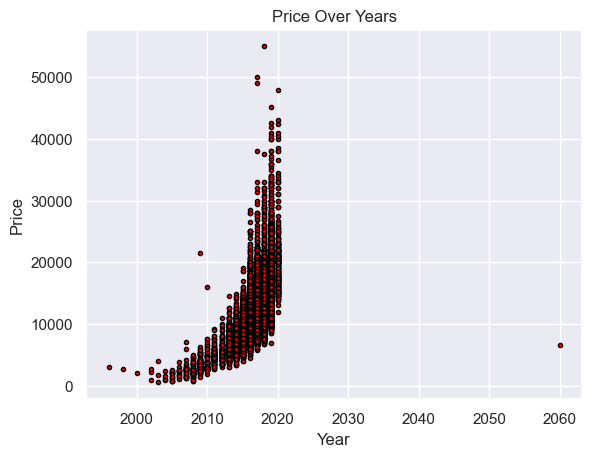

In [73]:
x = df['year']
y = df['price']

plt.scatter(x, y, c='red', marker='.', edgecolors='black')
plt.title('Price Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [60]:
df.loc[df['year'] > 2025] 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17572,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [61]:
df.at[17572, 'year'] = 2017
df.iloc[17572]

model              Fiesta
year                 2017
price                6495
transmission    Automatic
mileage             54807
fuelType           Petrol
tax                   205
mpg                  42.8
engineSize            1.4
Name: 17572, dtype: object

In [25]:
df.loc[(df["mpg"] > 85) & (df["fuelType"] != "Hybrid")]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
744,Fiesta,2016,7498,Manual,41271,Diesel,0,88.3,1.5
993,Fiesta,2016,7000,Manual,65000,Diesel,0,88.3,1.5
1031,Fiesta,2018,13495,Manual,14000,Diesel,145,88.3,1.5
1122,Fiesta,2016,8498,Manual,39271,Diesel,0,88.3,1.5
1683,Fiesta,2018,8991,Manual,30500,Diesel,145,88.3,1.5
...,...,...,...,...,...,...,...,...,...
16961,Fiesta,2018,10600,Manual,14861,Diesel,145,88.3,1.5
17043,Fiesta,2017,6795,Manual,65290,Diesel,0,88.3,1.5
17365,Fiesta,2017,6995,Manual,17000,Diesel,145,85.6,1.5
17510,Fiesta,2018,9100,Manual,55717,Diesel,145,88.3,1.5


In [53]:
df.iloc[17726]

model            EcoSport
year                 2018
price               13999
transmission       Manual
mileage              6500
fuelType           Petrol
tax                   150
mpg                  52.3
engineSize            1.0
Name: 17880, dtype: object

In [68]:
type_stats = df.groupby('model').agg({"price":['mean', 'median'], "mileage":['mean'], "year":['min', 'max', 'mean']}) 

type_stats.round(1).sort_values(("price", 'mean'), ascending=False)

price           mileage  year              
                           mean   median     mean   min   max    mean
model                                                                
 Mustang                34631.3  33979.0   9480.1  2016  2020  2018.2
 Edge                   22710.2  20800.0  21992.6  2016  2019  2017.3
 Puma                   21427.9  21495.0   3850.5  2002  2020  2019.1
 Tourneo Custom         21166.0  20000.0  21791.3  2015  2019  2017.7
 Galaxy                 17848.7  18000.0  32986.0  2005  2019  2016.4
 S-MAX                  17655.4  17247.0  32050.2  2006  2020  2016.5
 Kuga                   15819.2  15972.5  23714.9  2009  2020  2017.1
 Grand Tourneo Connect  14765.5  14000.0  24202.7  2014  2020  2017.2
 Ranger                 14495.0  14495.0  88000.0  2013  2013  2013.0
 Tourneo Connect        13862.4  12999.0  24565.6  2015  2020  2016.9
 Focus                  13179.0  12750.0  23767.7  2003  2020  2017.0
 EcoSport               12469.3  12000.0  16554.3  2014  2020  2017.5
 Transit Tourneo        12450.0  12450.0  19496.0  2014  2014  2014.0
 Mondeo                 12258.9  11544.5  45583.9  2002  2020  2016.0
 Grand C-MAX            10881.6  10798.0  27882.7  2011  2019  2016.3
 Fiesta                 10190.9   9995.0  21709.7  1998  2020  2016.8
 C-MAX                   9913.5  10000.0  28464.7  2006  2019  2016.0
 Ka+                     8699.0   8295.0  11588.5  2016  2020  2017.9
Focus                    8299.0   8299.0   5007.0  2015  2015  2015.0
 B-MAX                   8271.7   8250.0  28262.3  2012  2018  2015.5
 KA                      5206.8   4800.0  35443.2  2006  2019  2014.1
 Escort                  3000.0   3000.0  50000.0  1996  1996  1996.0
 Fusion                  2555.8   2443.0  65888.8  2004  2011  2008.1
 Streetka                1924.5   1924.5  68527.5  2005  2006  2005.5

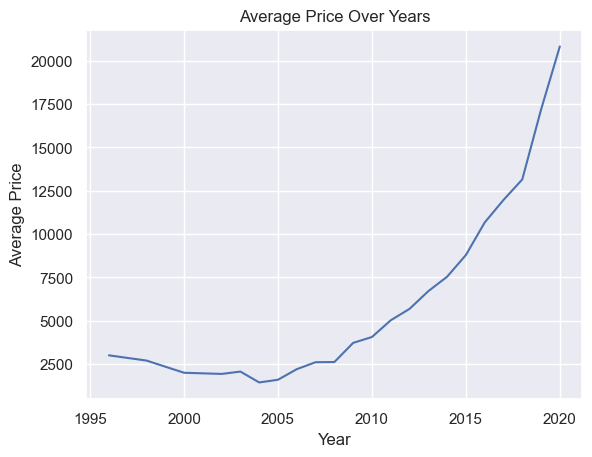

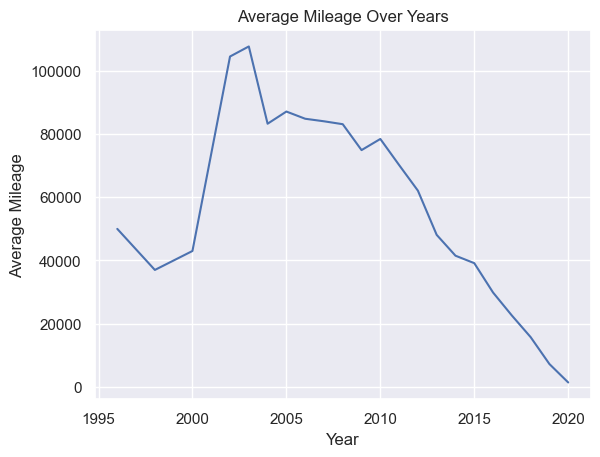

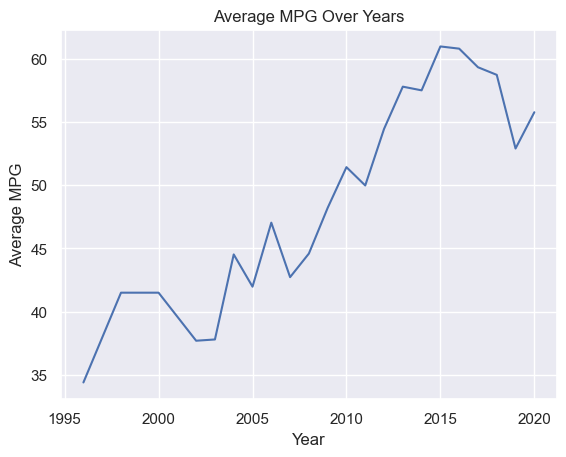

In [70]:
df.groupby('year')['price'].mean().plot()
plt.title('Average Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

df.groupby('year')['mileage'].mean().plot()
plt.title('Average Mileage Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mileage')
plt.show()

df.groupby('year')['mpg'].mean().plot()
plt.title('Average MPG Over Years')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.show()


In [36]:
sns.set_theme()


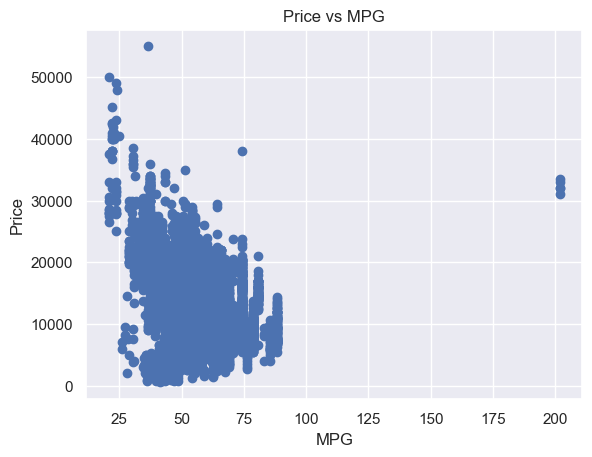

In [32]:
plt.scatter(df['mpg'], df['price'])
plt.title('Price vs MPG')
plt.xlabel('MPG')
plt.ylabel('Price')
plt.show()

In [69]:
kugas = df.loc[df['model'] == 'Kuga']

Empty DataFrame
Columns: [model, year, price, transmission, mileage, fuelType, tax, mpg, engineSize]
Index: []


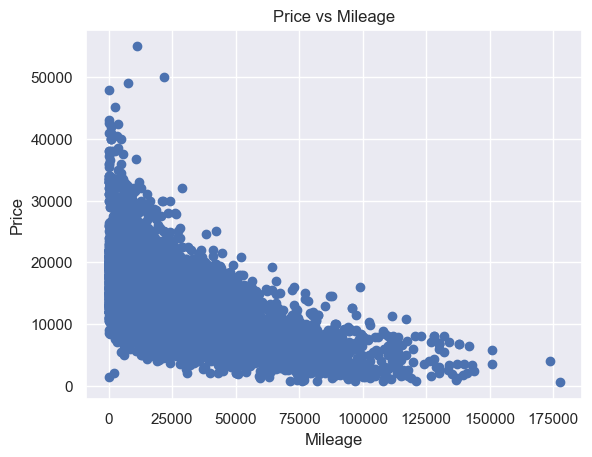

In [33]:
plt.scatter(df['mileage'], df['price'])
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


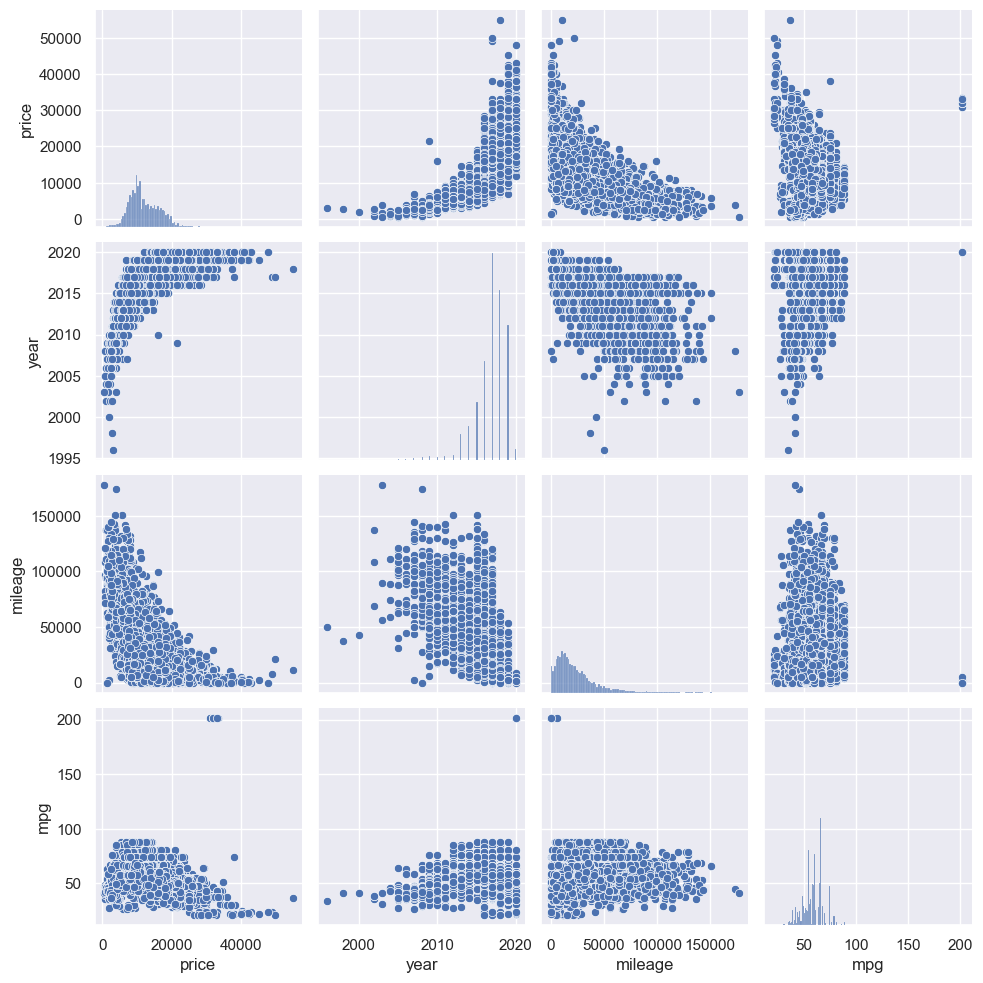

In [35]:
sns.pairplot(df[['price', 'year', 'mileage', 'mpg']])
plt.show()